<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Connor_Heraty_LS_DS_222_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 24.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-02 16:24:20--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.1’

misleading.py.1     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-02 16:24:20 (202 MB/s) - ‘misleading.py.1’ saved [1258/1258]



### Fix misleading plot #1

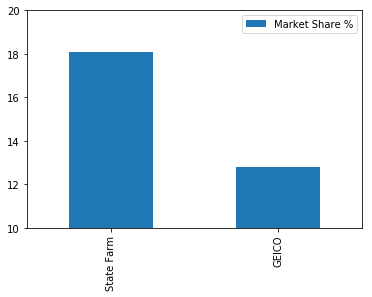

In [4]:
misleading.plot1();

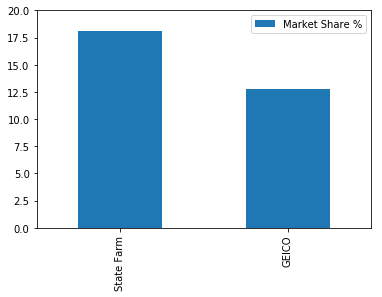

In [8]:
insurance = pd.DataFrame(
index = ['State Farm','GEICO'],
data={'Market Share %': [18.07, 12.79]})

insurance.plot.bar(ylim = (0, 20));

### Fix misleading plot #2

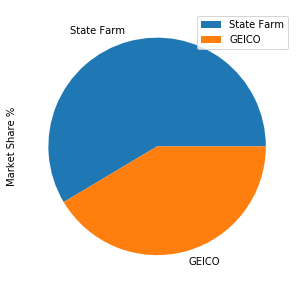

In [5]:
misleading.plot2();

In [11]:
other = pd.DataFrame(
index=['other'],
data={'Market Share %': [100 - 18.07 -12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
other,69.14


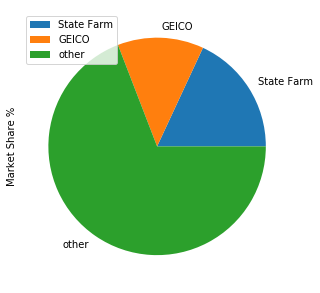

In [14]:
insurance.plot.pie('Market Share %', figsize=(5, 5));

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [15]:
misleading.plot3()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

# Return and fix chloropleth graph

In [27]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
variable = 'State Farm market share %'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: RepeatRef({
        repeat: 'row'
      }),
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data: 'https://vega.github.io/vega-datasets/data/population_engineers_hurricanes.csv',
      fields: ['population', 'engineers', 'hurricanes'],
      key: 'id'
    }),
    lookup: 'id'
  })],
  width: 500
})

In [0]:
url = 'https://raw.githubusercontent.com/connorpheraty/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)

In [0]:
df = df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'})

In [19]:
(df['State Farm policy premiums'] + df['BERKSHIRE HATHAWAY GRP'] == df['STATE TOTAL']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [0]:
df['State Farm market share %'] = df['State Farm policy premiums'] / df['STATE TOTAL']

In [21]:
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [29]:
df.shape

(44, 3)

### See the data

In [30]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby(df['dataset'])

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [36]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [37]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [38]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [39]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [40]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

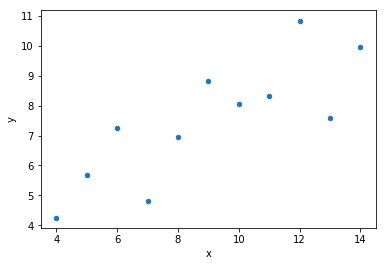

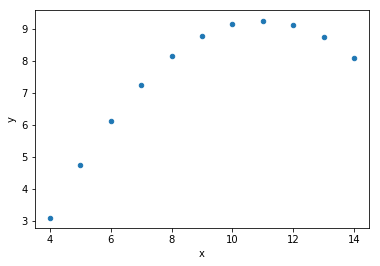

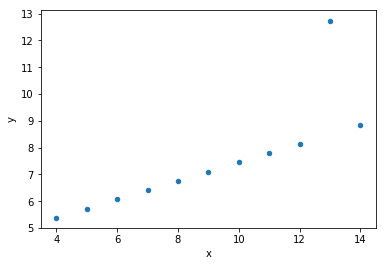

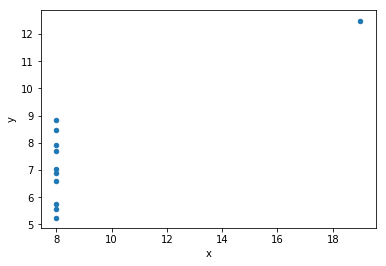

In [44]:
groups.plot('x','y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

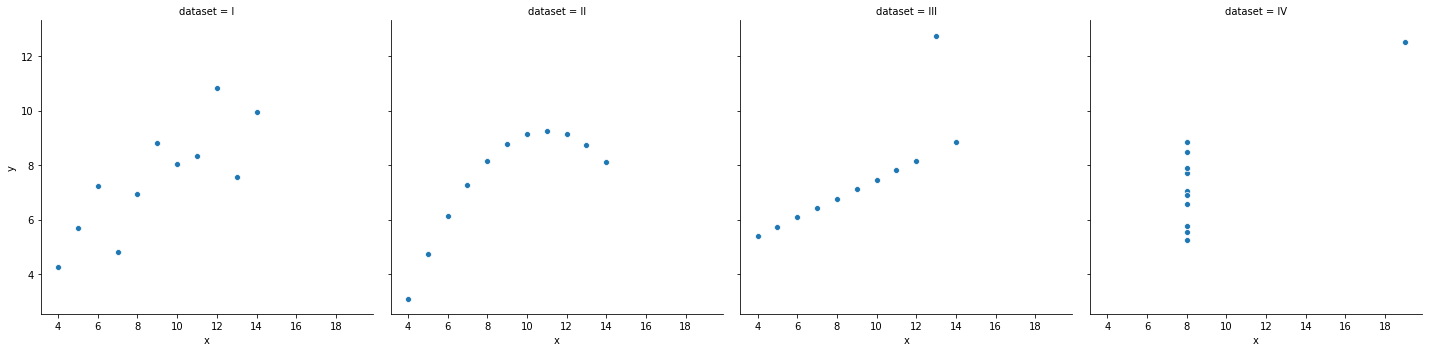

In [197]:
sns.relplot(x='x', y='y', data=df, col='dataset');

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

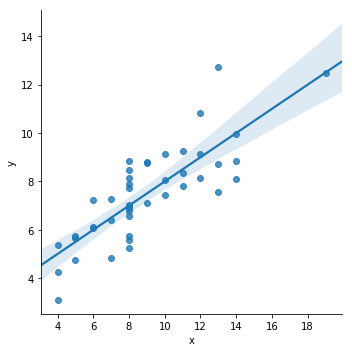

In [200]:
sns.lmplot(x='x', y='y', data=df);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [202]:
tips.shape

(244, 7)

### See the first 5 rows

In [203]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
tips['smoker'] = tips['smoker'].replace({
    'Yes': 1,
    'No': 0
})

### Describe the data

In [205]:
tips.describe()

,total_bill,tip,smoker,size
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.381148,2.569672
std,8.902412,1.383638,0.486667,0.951100
min,3.070000,1.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,2.000000
50%,17.795000,2.900000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,3.000000
max,50.810000,10.000000,1.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

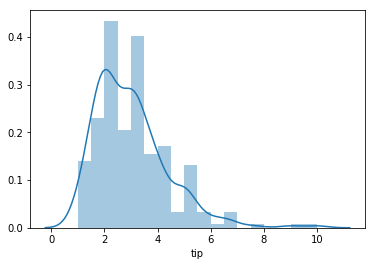

In [206]:
sns.distplot(tips.tip);

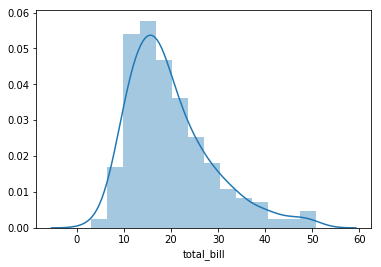

In [207]:
sns.distplot(tips.total_bill)

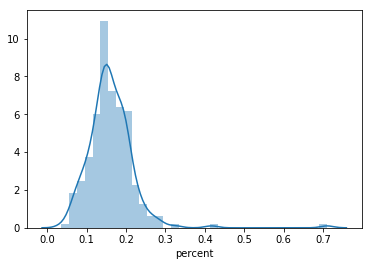

In [208]:
tips['percent'] = tips.tip / tips.total_bill
sns.distplot(tips.percent);

In [209]:
tip_buckets = tips.percent.value_counts(bins=30).sort_index()
tip_buckets

(0.034, 0.0581]      3
(0.0581, 0.0806]    12
(0.0806, 0.103]     16
(0.103, 0.126]      28
(0.126, 0.148]      44
(0.148, 0.171]      48
(0.171, 0.193]      34
(0.193, 0.216]      34
(0.216, 0.238]      12
(0.238, 0.261]       5
(0.261, 0.283]       4
(0.283, 0.306]       1
(0.306, 0.328]       1
(0.328, 0.351]       0
(0.351, 0.373]       0
(0.373, 0.395]       0
(0.395, 0.418]       1
(0.418, 0.44]        0
(0.44, 0.463]        0
(0.463, 0.485]       0
(0.485, 0.508]       0
(0.508, 0.53]        0
(0.53, 0.553]        0
(0.553, 0.575]       0
(0.575, 0.598]       0
(0.598, 0.62]        0
(0.62, 0.643]        0
(0.643, 0.665]       0
(0.665, 0.688]       0
(0.688, 0.71]        1
Name: percent, dtype: int64

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

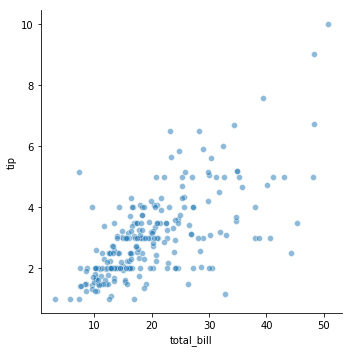

In [210]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5);

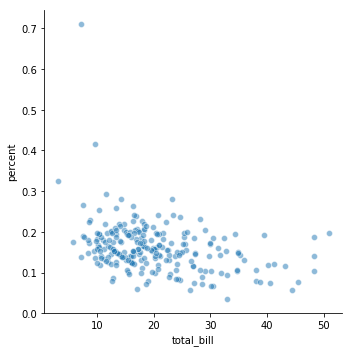

In [211]:
sns.relplot('total_bill', 'percent', data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [212]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

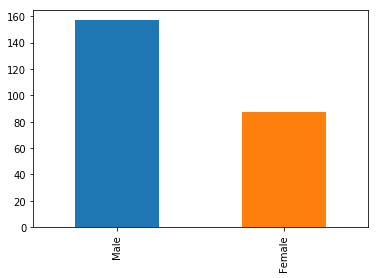

In [213]:
tips.sex.value_counts().plot.bar();

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

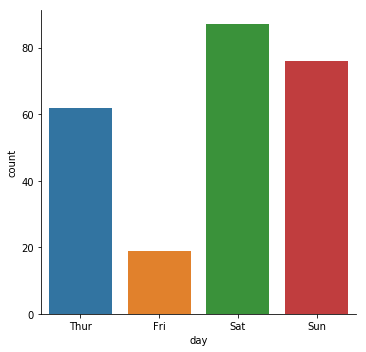

In [214]:
sns.catplot('day', data=tips, kind='count');

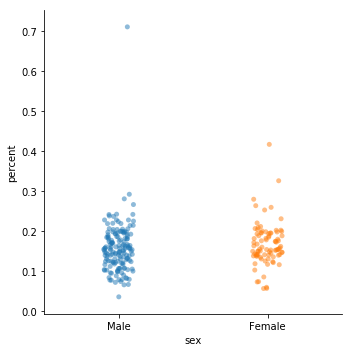

In [215]:
sns.catplot('sex', 'percent' ,  data=tips, kind='strip', alpha=0.5);

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [217]:
flights.shape

(144, 3)

### See the first 5 rows

In [218]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [219]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

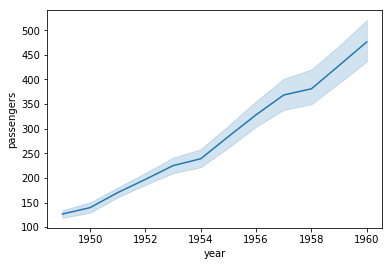

In [220]:
sns.lineplot(x='year', y='passengers', data=flights);

In [221]:
import altair as alt

alt.Chart(flights).mark_bar(
    color="lightblue",
    interpolate='step-after',
    line=True
).encode(
    x='year',
    y='passengers'
)

Chart({
  data:      year      month  passengers
  0    1949    January         112
  1    1949   February         118
  2    1949      March         132
  3    1949      April         129
  4    1949        May         121
  5    1949       June         135
  6    1949       July         148
  7    1949     August         148
  8    1949  September         136
  9    1949    October         119
  10   1949   November         104
  11   1949   December         118
  12   1950    January         115
  13   1950   February         126
  14   1950      March         141
  15   1950      April         135
  16   1950        May         125
  17   1950       June         149
  18   1950       July         170
  19   1950     August         170
  20   1950  September         158
  21   1950    October         133
  22   1950   November         114
  23   1950   December         140
  24   1951    January         145
  25   1951   February         150
  26   1951      March         178
  27   1951      April         163
  28   1951        May         172
  29   1951       June         178
  ..    ...        ...         ...
  114  1958       July         491
  115  1958     August         505
  116  1958  September         404
  117  1958    October         359
  118  1958   November         310
  119  1958   December         337
  120  1959    January         360
  121  1959   February         342
  122  1959      March         406
  123  1959      April         396
  124  1959        May         420
  125  1959       June         472
  126  1959       July         548
  127  1959     August         559
  128  1959  September         463
  129  1959    October         407
  130  1959   November         362
  131  1959   December         405
  132  1960    January         417
  133  1960   February         391
  134  1960      March         419
  135  1960      April         461
  136  1960        May         472
  137  1960       June         535
  138  1960       July         622
  139  1960     August         606
  140  1960  September         508
  141  1960    October         461
  142  1960   November         390
  143  1960   December         432
  
  [144 rows x 3 columns],
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'year'
    }),
    y: Y({
      shorthand: 'passengers'
    })
  }),
  mark: MarkDef({
    color: 'lightblue',
    interpolate: 'step-after',
    line: True,
    type: 'bar'
  })
})

### Plot month & passengers

In [222]:
alt.Chart(flights, height=400, width=700).mark_line().encode(
    x='year',
    y='passengers',
    color='month'
)

Chart({
  data:      year      month  passengers
  0    1949    January         112
  1    1949   February         118
  2    1949      March         132
  3    1949      April         129
  4    1949        May         121
  5    1949       June         135
  6    1949       July         148
  7    1949     August         148
  8    1949  September         136
  9    1949    October         119
  10   1949   November         104
  11   1949   December         118
  12   1950    January         115
  13   1950   February         126
  14   1950      March         141
  15   1950      April         135
  16   1950        May         125
  17   1950       June         149
  18   1950       July         170
  19   1950     August         170
  20   1950  September         158
  21   1950    October         133
  22   1950   November         114
  23   1950   December         140
  24   1951    January         145
  25   1951   February         150
  26   1951      March         178
  27   1951      April         163
  28   1951        May         172
  29   1951       June         178
  ..    ...        ...         ...
  114  1958       July         491
  115  1958     August         505
  116  1958  September         404
  117  1958    October         359
  118  1958   November         310
  119  1958   December         337
  120  1959    January         360
  121  1959   February         342
  122  1959      March         406
  123  1959      April         396
  124  1959        May         420
  125  1959       June         472
  126  1959       July         548
  127  1959     August         559
  128  1959  September         463
  129  1959    October         407
  130  1959   November         362
  131  1959   December         405
  132  1960    January         417
  133  1960   February         391
  134  1960      March         419
  135  1960      April         461
  136  1960        May         472
  137  1960       June         535
  138  1960       July         622
  139  1960     August         606
  140  1960  September         508
  141  1960    October         461
  142  1960   November         390
  143  1960   December         432
  
  [144 rows x 3 columns],
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'month'
    }),
    x: X({
      shorthand: 'year'
    }),
    y: Y({
      shorthand: 'passengers'
    })
  }),
  height: 400,
  mark: 'line',
  width: 700
})

In [223]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [0]:
grouped = (flights.groupby( ['month'])
           .passengers.agg(['mean'])
          .rename(columns = {'mean': 'Average Passengers'})
           .reset_index()
          )


In [0]:
grouped = grouped.sort_values(by=['Average Passengers'], ascending=False)

In [226]:
alt.Chart(grouped, title = 'Average Passengers per Month', height=400, width=600).mark_bar().encode(
    alt.X('month', sort = alt.EncodingSortField(op='count',order='ascending')),
    alt.Y('Average Passengers')
)

Chart({
  data:         month  Average Passengers
  6        July          351.333333
  7      August          351.083333
  5        June          311.666667
  8   September          302.416667
  4         May          271.833333
  2       March          270.166667
  3       April          267.083333
  9     October          266.583333
  11   December          261.833333
  0     January          241.750000
  1    February          235.000000
  10   November          232.833333,
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'month',
      sort: EncodingSortField({
        op: 'count',
        order: 'ascending'
      })
    }),
    y: Y({
      shorthand: 'Average Passengers'
    })
  }),
  height: 400,
  mark: 'bar',
  title: 'Average Passengers per Month',
  width: 600
})

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [227]:
table = flights.pivot_table('passengers','month','year')

table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

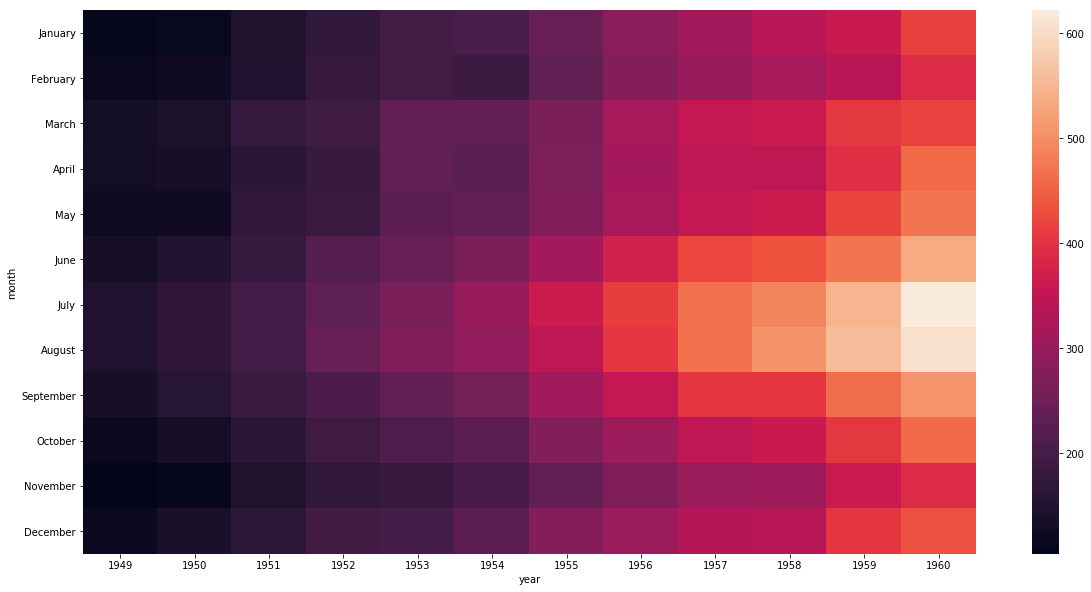

In [228]:
plt.figure(figsize=(20,10))
sns.heatmap(table);

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [231]:
import altair as alt
import pandas as pd

source = pd.DataFrame([
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'}
    ])

domains = ['person', 'cattle', 'pigs', 'sheep']

shape_scale = alt.Scale(
    domain=domains,
    range=[
        'M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 -0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 -0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 -0.6 -0.4 -0.6z',
        'M4 -2c0 0 0.9 -0.7 1.1 -0.8c0.1 -0.1 -0.1 0.5 -0.3 0.7c-0.2 0.2 1.1 1.1 1.1 1.2c0 0.2 -0.2 0.8 -0.4 0.7c-0.1 0 -0.8 -0.3 -1.3 -0.2c-0.5 0.1 -1.3 1.6 -1.5 2c-0.3 0.4 -0.6 0.4 -0.6 0.4c0 0.1 0.3 1.7 0.4 1.8c0.1 0.1 -0.4 0.1 -0.5 0c0 0 -0.6 -1.9 -0.6 -1.9c-0.1 0 -0.3 -0.1 -0.3 -0.1c0 0.1 -0.5 1.4 -0.4 1.6c0.1 0.2 0.1 0.3 0.1 0.3c0 0 -0.4 0 -0.4 0c0 0 -0.2 -0.1 -0.1 -0.3c0 -0.2 0.3 -1.7 0.3 -1.7c0 0 -2.8 -0.9 -2.9 -0.8c-0.2 0.1 -0.4 0.6 -0.4 1c0 0.4 0.5 1.9 0.5 1.9l-0.5 0l-0.6 -2l0 -0.6c0 0 -1 0.8 -1 1c0 0.2 -0.2 1.3 -0.2 1.3c0 0 0.3 0.3 0.2 0.3c0 0 -0.5 0 -0.5 0c0 0 -0.2 -0.2 -0.1 -0.4c0 -0.1 0.2 -1.6 0.2 -1.6c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 0 -2.7 -0.2 -2.7c-0.1 0 -0.4 2 -0.4 2c0 0 0 0.2 -0.2 0.5c-0.1 0.4 -0.2 1.1 -0.2 1.1c0 0 -0.2 -0.1 -0.2 -0.2c0 -0.1 -0.1 -0.7 0 -0.7c0.1 -0.1 0.3 -0.8 0.4 -1.4c0 -0.6 0.2 -1.3 0.4 -1.5c0.1 -0.2 0.6 -0.4 0.6 -0.4z',
        'M1.2 -2c0 0 0.7 0 1.2 0.5c0.5 0.5 0.4 0.6 0.5 0.6c0.1 0 0.7 0 0.8 0.1c0.1 0 0.2 0.2 0.2 0.2c0 0 -0.6 0.2 -0.6 0.3c0 0.1 0.4 0.9 0.6 0.9c0.1 0 0.6 0 0.6 0.1c0 0.1 0 0.7 -0.1 0.7c-0.1 0 -1.2 0.4 -1.5 0.5c-0.3 0.1 -1.1 0.5 -1.1 0.7c-0.1 0.2 0.4 1.2 0.4 1.2l-0.4 0c0 0 -0.4 -0.8 -0.4 -0.9c0 -0.1 -0.1 -0.3 -0.1 -0.3l-0.2 0l-0.5 1.3l-0.4 0c0 0 -0.1 -0.4 0 -0.6c0.1 -0.1 0.3 -0.6 0.3 -0.7c0 0 -0.8 0 -1.5 -0.1c-0.7 -0.1 -1.2 -0.3 -1.2 -0.2c0 0.1 -0.4 0.6 -0.5 0.6c0 0 0.3 0.9 0.3 0.9l-0.4 0c0 0 -0.4 -0.5 -0.4 -0.6c0 -0.1 -0.2 -0.6 -0.2 -0.5c0 0 -0.4 0.4 -0.6 0.4c-0.2 0.1 -0.4 0.1 -0.4 0.1c0 0 -0.1 0.6 -0.1 0.6l-0.5 0l0 -1c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 -0.7 -1.2 -0.6 -1.4c0.1 -0.1 0.1 -1.1 0.1 -1.1c0 0 -0.2 0.1 -0.2 0.1c0 0 0 0.9 0 1c0 0.1 -0.2 0.3 -0.3 0.3c-0.1 0 0 -0.5 0 -0.9c0 -0.4 0 -0.4 0.2 -0.6c0.2 -0.2 0.6 -0.3 0.8 -0.8c0.3 -0.5 1 -0.6 1 -0.6z',
        'M-4.1 -0.5c0.2 0 0.2 0.2 0.5 0.2c0.3 0 0.3 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.4 -0.2c0.1 0 0.2 0.2 0.4 0.1c0.2 0 0.2 -0.2 0.4 -0.3c0.1 0 0.1 -0.1 0.4 0c0.3 0 0.3 -0.4 0.6 -0.4c0.3 0 0.6 -0.3 0.7 -0.2c0.1 0.1 1.4 1 1.3 1.4c-0.1 0.4 -0.3 0.3 -0.4 0.3c-0.1 0 -0.5 -0.4 -0.7 -0.2c-0.3 0.2 -0.1 0.4 -0.2 0.6c-0.1 0.1 -0.2 0.2 -0.3 0.4c0 0.2 0.1 0.3 0 0.5c-0.1 0.2 -0.3 0.2 -0.3 0.5c0 0.3 -0.2 0.3 -0.3 0.6c-0.1 0.2 0 0.3 -0.1 0.5c-0.1 0.2 -0.1 0.2 -0.2 0.3c-0.1 0.1 0.3 1.1 0.3 1.1l-0.3 0c0 0 -0.3 -0.9 -0.3 -1c0 -0.1 -0.1 -0.2 -0.3 -0.2c-0.2 0 -0.3 0.1 -0.4 0.4c0 0.3 -0.2 0.8 -0.2 0.8l-0.3 0l0.3 -1c0 0 0.1 -0.6 -0.2 -0.5c-0.3 0.1 -0.2 -0.1 -0.4 -0.1c-0.2 -0.1 -0.3 0.1 -0.4 0c-0.2 -0.1 -0.3 0.1 -0.5 0c-0.2 -0.1 -0.1 0 -0.3 0.3c-0.2 0.3 -0.4 0.3 -0.4 0.3l0.2 1.1l-0.3 0l-0.2 -1.1c0 0 -0.4 -0.6 -0.5 -0.4c-0.1 0.3 -0.1 0.4 -0.3 0.4c-0.1 -0.1 -0.2 1.1 -0.2 1.1l-0.3 0l0.2 -1.1c0 0 -0.3 -0.1 -0.3 -0.5c0 -0.3 0.1 -0.5 0.1 -0.7c0.1 -0.2 -0.1 -1 -0.2 -1.1c-0.1 -0.2 -0.2 -0.8 -0.2 -0.8c0 0 -0.1 -0.5 0.4 -0.8z'
    ]
)

color_scale = alt.Scale(
    domain=domains,
    range=['rgb(162,160,152)', 'rgb(194,81,64)', 'rgb(93,93,93)', 'rgb(91,131,149)']
)

alt.Chart(source).mark_point(filled=True, opacity=1, size=200).encode(
    alt.X('x:O', axis=None),
    alt.Y('animal:O', axis=None),
    alt.Row('country:N', header=alt.Header(title='')),
    alt.Shape('animal:N', legend=None, scale=shape_scale),
    alt.Color('animal:N', legend=None, scale=color_scale),
).transform_window(
    x='rank()',
    groupby=['country', 'animal']
).properties(width=800, height=200)

Chart({
  data:     animal        country
  0   cattle  Great Britain
  1   cattle  Great Britain
  2   cattle  Great Britain
  3     pigs  Great Britain
  4     pigs  Great Britain
  5    sheep  Great Britain
  6    sheep  Great Britain
  7    sheep  Great Britain
  8    sheep  Great Britain
  9    sheep  Great Britain
  10   sheep  Great Britain
  11   sheep  Great Britain
  12   sheep  Great Britain
  13   sheep  Great Britain
  14   sheep  Great Britain
  15  cattle  United States
  16  cattle  United States
  17  cattle  United States
  18  cattle  United States
  19  cattle  United States
  20  cattle  United States
  21  cattle  United States
  22  cattle  United States
  23  cattle  United States
  24    pigs  United States
  25    pigs  United States
  26    pigs  United States
  27    pigs  United States
  28    pigs  United States
  29    pigs  United States
  30   sheep  United States
  31   sheep  United States
  32   sheep  United States
  33   sheep  United States
  34   sheep  United States
  35   sheep  United States
  36   sheep  United States,
  encoding: EncodingWithFacet({
    color: Color({
      legend: None,
      scale: Scale({
        domain: ['person', 'cattle', 'pigs', 'sheep'],
        range: ['rgb(162,160,152)', 'rgb(194,81,64)', 'rgb(93,93,93)', 'rgb(91,131,149)']
      }),
      shorthand: 'animal:N'
    }),
    row: Row({
      header: Header({
        title: ''
      }),
      shorthand: 'country:N'
    }),
    shape: Shape({
      legend: None,
      scale: Scale({
        domain: ['person', 'cattle', 'pigs', 'sheep'],
        range: ['M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 -0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 -0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 -0.6 -0.4 -0.6z', 'M4 -2c0 0 0.9 -0.7 1.1 -0.8c0.1 -0.1 -0.1 0.5 -0.3 0.7c-0.2 0.2 1.1 1.1 1.1 1.2c0 0.2 -0.2 0.8 -0.4 0.7c-0.1 0 -0.8 -0.3 -1.3 -0.2c-0.5 0.1 -1.3 1.6 -1.5 2c-0.3 0.4 -0.6 0.4 -0.6 0.4c0 0.1 0.3 1.7 0.4 1.8c0.1 0.1 -0.4 0.1 -0.5 0c0 0 -0.6 -1.9 -0.6 -1.9c-0.1 0 -0.3 -0.1 -0.3 -0.1c0 0.1 -0.5 1.4 -0.4 1.6c0.1 0.2 0.1 0.3 0.1 0.3c0 0 -0.4 0 -0.4 0c0 0 -0.2 -0.1 -0.1 -0.3c0 -0.2 0.3 -1.7 0.3 -1.7c0 0 -2.8 -0.9 -2.9 -0.8c-0.2 0.1 -0.4 0.6 -0.4 1c0 0.4 0.5 1.9 0.5 1.9l-0.5 0l-0.6 -2l0 -0.6c0 0 -1 0.8 -1 1c0 0.2 -0.2 1.3 -0.2 1.3c0 0 0.3 0.3 0.2 0.3c0 0 -0.5 0 -0.5 0c0 0 -0.2 -0.2 -0.1 -0.4c0 -0.1 0.2 -1.6 0.2 -1.6c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 0 -2.7 -0.2 -2.7c-0.1 0 -0.4 2 -0.4 2c0 0 0 0.2 -0.2 0.5c-0.1 0.4 -0.2 1.1 -0.2 1.1c0 0 -0.2 -0.1 -0.2 -0.2c0 -0.1 -0.1 -0.7 0 -0.7c0.1 -0.1 0.3 -0.8 0.4 -1.4c0 -0.6 0.2 -1.3 0.4 -1.5c0.1 -0.2 0.6 -0.4 0.6 -0.4z', 'M1.2 -2c0 0 0.7 0 1.2 0.5c0.5 0.5 0.4 0.6 0.5 0.6c0.1 0 0.7 0 0.8 0.1c0.1 0 0.2 0.2 0.2 0.2c0 0 -0.6 0.2 -0.6 0.3c0 0.1 0.4 0.9 0.6 0.9c0.1 0 0.6 0 0.6 0.1c0 0.1 0 0.7 -0.1 0.7c-0.1 0 -1.2 0.4 -1.5 0.5c-0.3 0.1 -1.1 0.5 -1.1 0.7c-0.1 0.2 0.4 1.2 0.4 1.2l-0.4 0c0 0 -0.4 -0.8 -0.4 -0.9c0 -0.1 -0.1 -0.3 -0.1 -0.3l-0.2 0l-0.5 1.3l-0.4 0c0 0 -0.1 -0.4 0 -0.6c0.1 -0.1 0.3 -0.6 0.3 -0.7c0 0 -0.8 0 -1.5 -0.1c-0.7 -0.1 -1.2 -0.3 -1.2 -0.2c0 0.1 -0.4 0.6 -0.5 0.6c0 0 0.3 0.9 0.3 0.9l-0.4 0c0 0 -0.4 -0.5 -0.4 -0.6c0 -0.1 -0.2 -0.6 -0.2 -0.5c0 0 -0.4 0.4 -0.6 0.4c-0.2 0.1 -0.4 0.1 -0.4 0.1c0 0 -0.1 0.6 -0.1 0.6l-0.5 0l0 -1c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 -0.7 -1.2 -0.6 -1.4c0.1 -0.1 0.1 -1.1 0.1 -1.1c0 0 -0.2 0.1 -0.2 0.1c0 0 0 0.9 0 1c0 0.1 -0.2 0.3 -0.3 0.3c-0.1 0 0 -0.5 0 -0.9c0 -0.4 0 -0.4 0.2 -0.6c0.2 -0.2 0.6 -0.3 0.8 -0.8c0.3 -0.5 1 -0.6 1 -0.6z', 'M-4.1 -0.5c0.2 0 0.2 0.2 0.5 0.2c0.3 0 0.3 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.4 -0.2c0.1 0 0.2 0.2 0.4 0.1c0.2 0 0.2 -0.2 0.4 -0.3c0.1 0 0.1 -0.1 0.4 0c0.3 0 0.3 -0.4 0.6 -0.4c0.3 0 0.6 -0.3 0.7 -0.2c0.1 0.1 1.4 1 1.3 1.4c-0.1 0.4 -0.3 0.3 -0.4 0.3c-0.1 0 -0.5 -0.4 -0.7 -0.2c-0.3 0.2 -0.1 0.4 -0.2 0.6c-0.